In [1]:
import pandas as pd

weather_df = pd.read_csv("Data/data.csv")
weather_df = weather_df.sample(frac=1)
weather_df.head(3)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
380,31.443066,74.301972,10.380151,68.345306,997.187766,no rain
1922,14.653254,83.309406,10.392229,13.921378,986.372225,no rain
1381,10.754819,64.750102,14.977192,18.007567,1013.434795,no rain


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = weather_df.drop("Rain", axis=1) 
y = weather_df["Rain"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numerical_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline",
         Pipeline([
             ('imputer', SimpleImputer(strategy="median")),('scaler', StandardScaler())
         ]),
         numerical_features
        ),
    ]
)
full_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125, n_jobs=-1)),
    ]
)
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind_Speed', 'Cloud_Cover',
                                                   'Pressure'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=125))])

In [6]:
from sklearn.metrics import accuracy_score, f1_score
predictions = full_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")
print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 100.0% F1: 1.0


In [7]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")


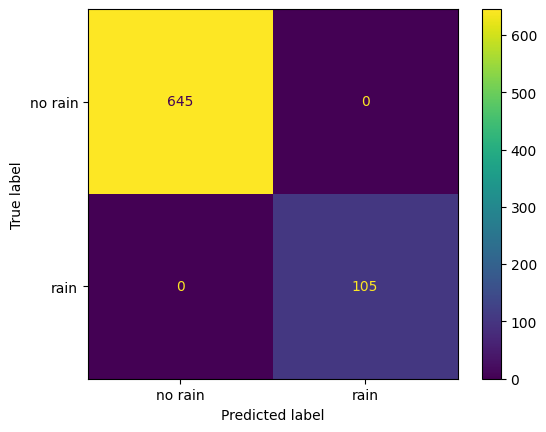

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=full_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=full_pipeline.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

In [10]:
import skops.io as sio
import os
os.makedirs("Model", exist_ok=True)
sio.dump(full_pipeline, "Model/weather_pipeline.skops")

In [26]:
loaded_model = sio.load(
    "Model/weather_pipeline.skops", 
    trusted=['numpy.dtype']
)
print(type(loaded_model))

<class 'sklearn.pipeline.Pipeline'>


In [25]:
sample_prediction = loaded_model.predict(X_test[:5])
print("Sample predictions:", sample_prediction)

Sample predictions: ['no rain' 'no rain' 'no rain' 'rain' 'no rain']


In [29]:
from sklearn import set_config
set_config(display='diagram')
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind_Speed', 'Cloud_Cover',
                                                   'Pressure'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=125))])